A regression model going to be fit in this short project based on a data set of a complex cycle power plant (CCPP)

Importing the necessary packeages.

In [1]:
import os
import pandas as pd
import 
import numpy as np


Data will be stored in pandas data frame. </br>
Because the data are stored in an excel table lets load the available datas by .read_excel() method.</br>

In [2]:
# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
pd_train = pd.read_excel(r'02_data/Train.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')
print(pd_train.shape)
print(pd_test.shape)

Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
(8568, 5)
(1000, 5)


Lets concentrate on the pd_train data and chek the by neked eye a littel bit. </br>
We can watch the first few lines of data by .head() method.

In [3]:
pd_train.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [10]:
pd_train.info()
pd_train.AT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB


0       10.54
1        7.08
2       14.49
3       10.73
4       22.88
        ...  
8563    17.10
8564    24.73
8565    30.44
8566    23.00
8567    17.75
Name: AT, Length: 8568, dtype: float64

Statistical description of data train

In [9]:
pd_train.describe()

,AT,V,AP,RH,PE
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,19.588562,54.243393,1013.276923,73.403318,454.503761
std,7.463503,12.724457,5.939926,14.529301,17.117243
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.447500,41.660000,1009.150000,63.487500,439.867500
50%,20.280000,52.065000,1012.940000,75.010000,451.745000
75%,25.680000,66.510000,1017.290000,84.852500,468.765000
max,37.110000,81.560000,1033.290000,100.160000,495.760000


<Axes: ylabel='Frequency'>

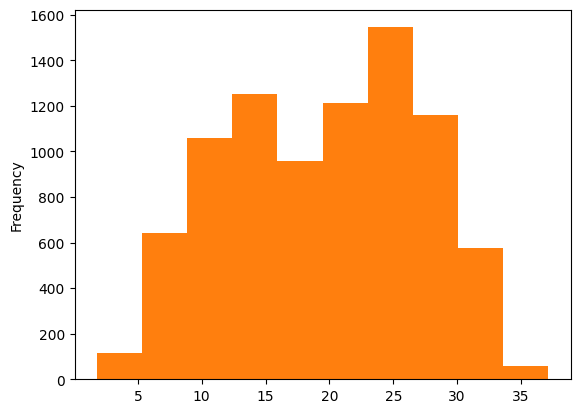

In [23]:
import matplotlib.pyplot as plt

data_at= pd_train.AT
plt.hist(pd_train['AT'])

pd_train.AT.plot(kind='hist')





<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Szilágyi Gergő\AppData\Local\Temp\ipykernel_25648\3820253857.py:4: SyntaxWarning: invalid escape sequence '\c'
  xlabel='Temperature [$^\circ$C]',


[Text(0.5, 1.0, 'Ambient Temperature'),
 Text(0.5, 0, 'Temperature [$^\\circ$C]'),
 Text(0, 0.5, 'Frequency')]

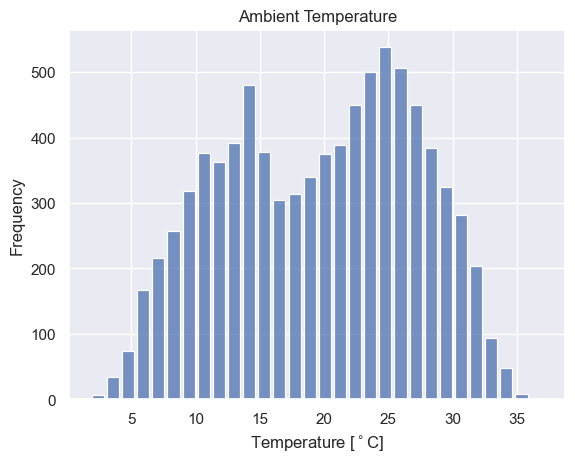

In [71]:
import seaborn as sns
ax = sns.histplot(pd_train['AT'],shrink=.8, )
ax.set(title='Ambient Temperature',
       xlabel='Temperature [$^\circ$C]',
       ylabel='Frequency')


[Text(0.5, 1.0, 'Atmospheric Pressure'),
 Text(0.5, 0, 'Pressure [mbar]'),
 Text(0, 0.5, 'Frequency')]

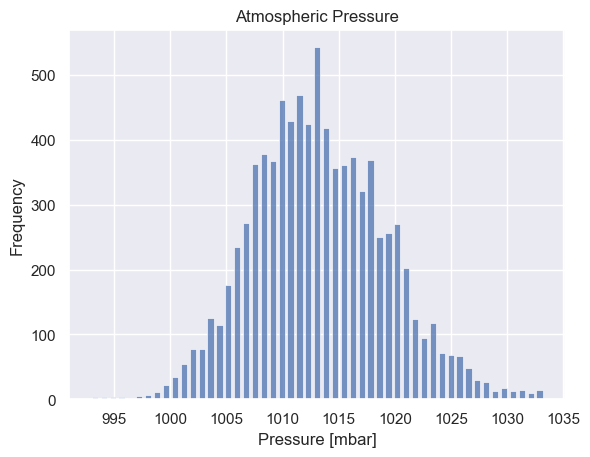

In [72]:
ax_AP = sns.histplot(pd_train['AP'],shrink=.7)
ax_AP.set(title='Atmospheric Pressure',
       xlabel='Pressure [mbar]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Relative Humidity'),
 Text(0.5, 0, ' Humidity [%]'),
 Text(0, 0.5, 'Frequency')]

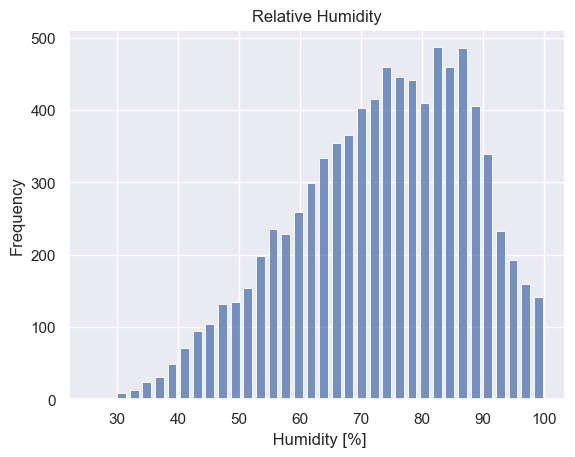

In [73]:
ax_RH = sns.histplot(pd_train['RH'],shrink=.7)
ax_RH.set(title='Relative Humidity',
       xlabel=' Humidity [%]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Exhaust Vacuum'),
 Text(0.5, 0, ' Exhaust Vacuum [cmHG]'),
 Text(0, 0.5, 'Frequency')]

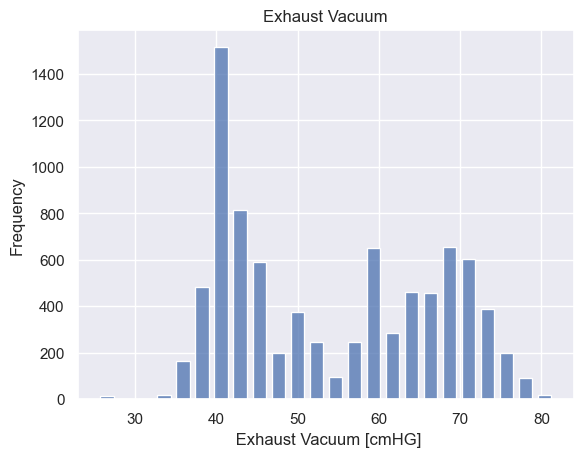

In [74]:
ax_V = sns.histplot(pd_train['V'],shrink=.7)
ax_V.set(title='Exhaust Vacuum',
       xlabel=' Exhaust Vacuum [cmHG]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Full Load Electrical Power Output'),
 Text(0.5, 0, ' Power Output[MW]'),
 Text(0, 0.5, 'Frequency')]

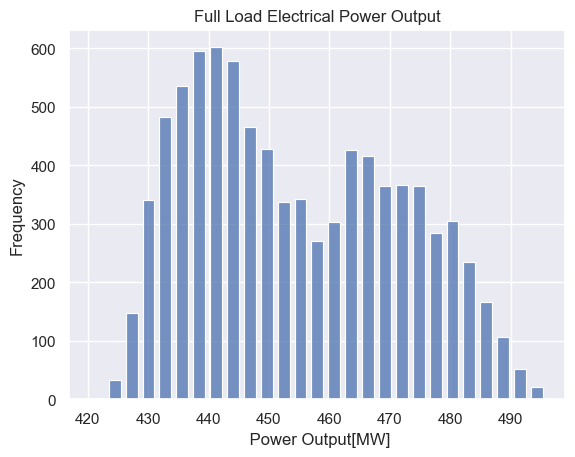

In [75]:
ax_PE = sns.histplot(pd_train['PE'],shrink=.7)
ax_PE.set(title='Full Load Electrical Power Output',
       xlabel=' Power Output[MW]',
       ylabel='Frequency')

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Szilágyi Gergő\AppData\Local\Temp\ipykernel_25648\215456117.py:10: SyntaxWarning: invalid escape sequence '\c'
  xlabel='Temperature [$^\circ$C]',


[Text(0.5, 1.0, 'Exhaust Vacuum'),
 Text(0.5, 0, ' Exhaust Vacuum [cmHG]'),
 Text(0, 0.5, 'Frequency')]

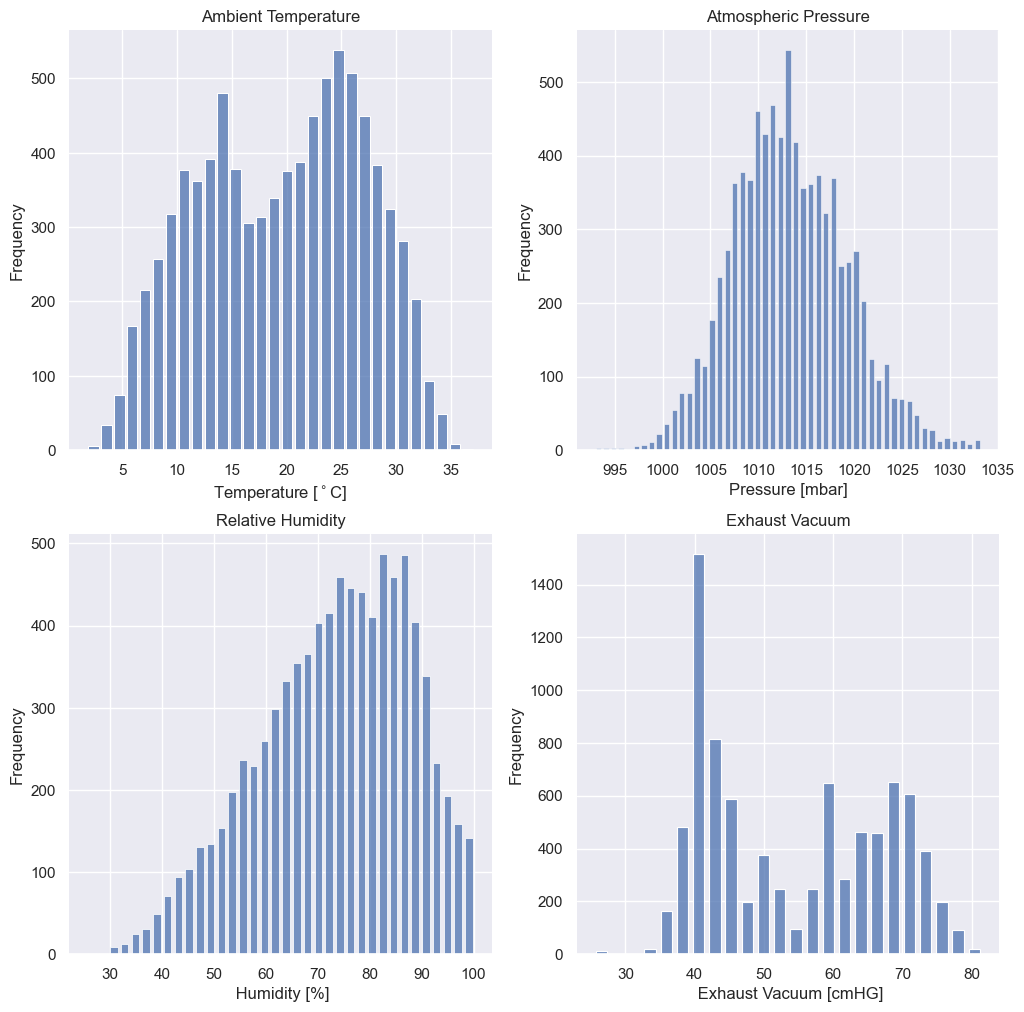

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f, axes = plt.subplots(2, 2, figsize=(12, 12),sharex=False, sharey=False)  
sns.despine(left=True)  

ax = sns.histplot(pd_train['AT'],shrink=.8, ax=axes[0, 0])
ax.set(title='Ambient Temperature',
       xlabel='Temperature [$^\circ$C]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['AP'],shrink=.7, ax=axes[0, 1])
ax.set(title='Atmospheric Pressure',
       xlabel='Pressure [mbar]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['RH'], shrink=.7, ax=axes[1, 0])
ax.set(title='Relative Humidity',
       xlabel=' Humidity [%]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['V'], shrink=.7, ax=axes[1, 1])
ax.set(title='Exhaust Vacuum',
       xlabel=' Exhaust Vacuum [cmHG]',
       ylabel='Frequency')


[Text(0.5, 1.0, 'Full Load Electrical Power Output'),
 Text(0.5, 0, ' Power Output[MW]'),
 Text(0, 0.5, 'Frequency')]

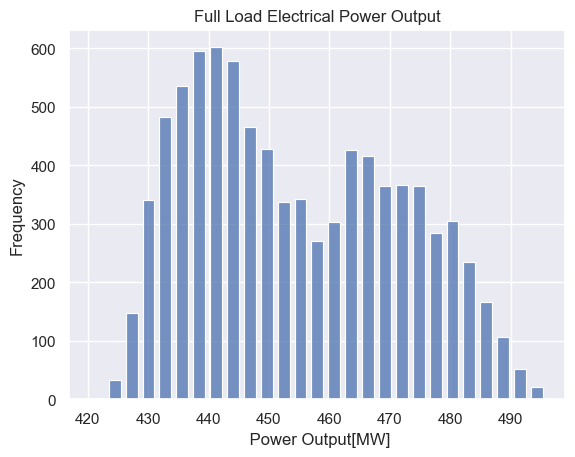

In [90]:
ax = sns.histplot(pd_train['PE'],shrink=.7)
ax.set(title='Full Load Electrical Power Output',
       xlabel=' Power Output [MW]',
       ylabel='Frequency')

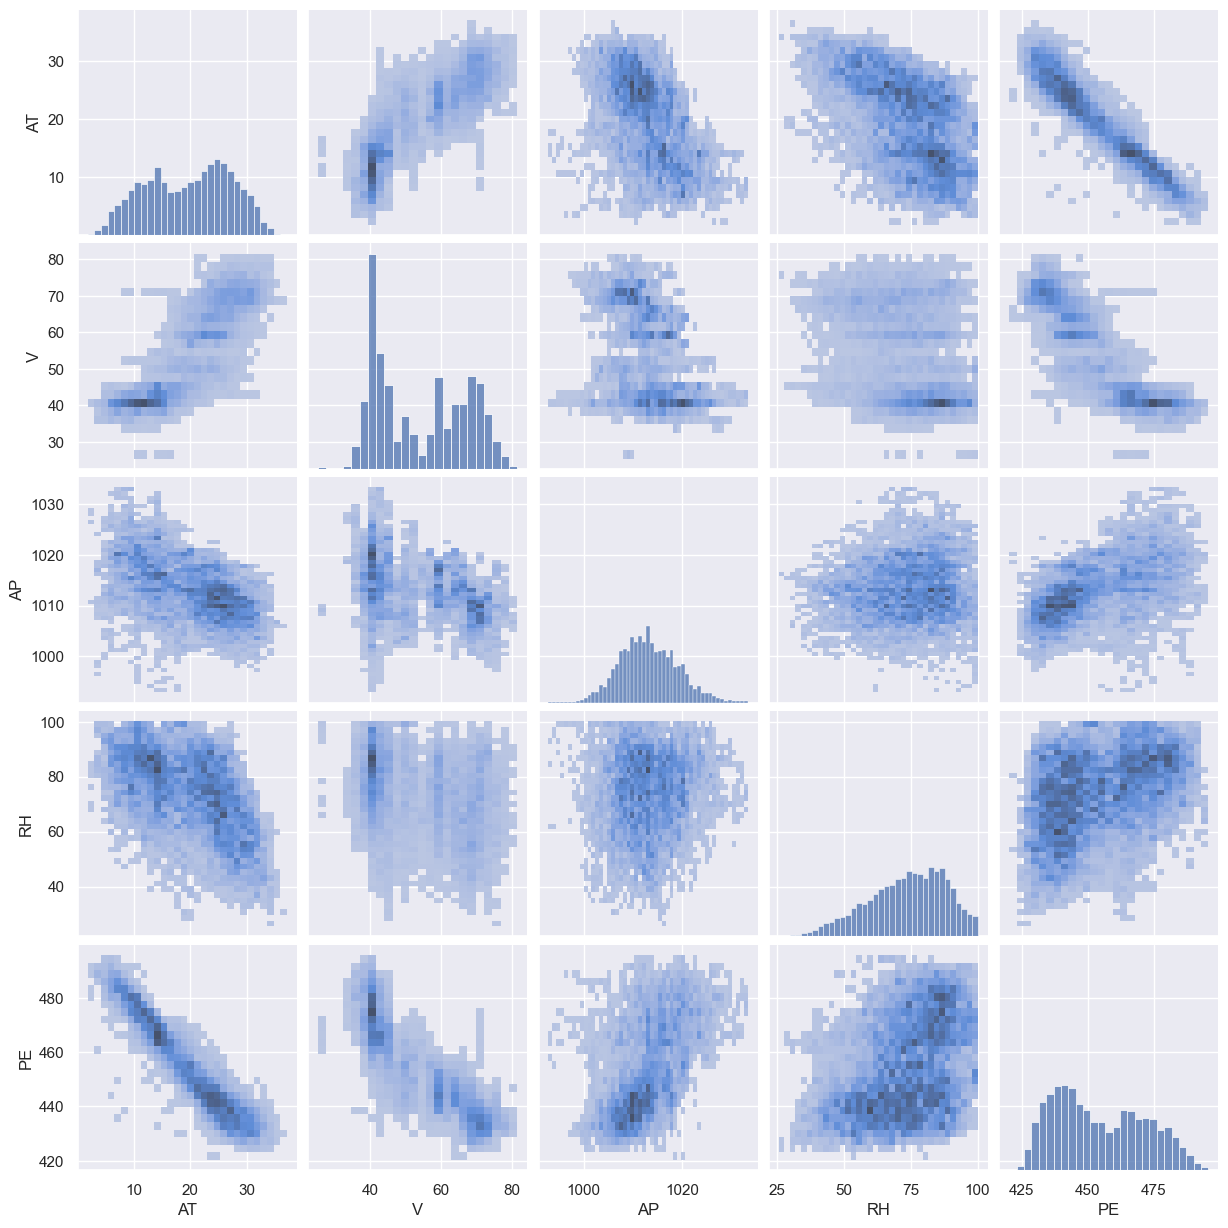

In [93]:
sns.pairplot(pd_train,kind="hist")